Выполнил: Драгомирский Даглар Сарматович

Группа: РИМ-220963

# HW1

Мы разбили ваш проект на 2 части и предлагаем начать выполнение 1 части. Ниже вы найдете все детали этого задания. Советуем выполнить его прямо сейчас, сохранить ваш jupiter-ноутбук и отправить все три выполненных части проекта на проверку на последней неделе курса.

## ЗАДАЧА
По данным из соревнования:

* Сделайте EDA.
* Придумайте эвристику для предсказания целевого класса. На данном этапе нельзя использовать ML, допускаются исключительно наивные методы.
* Реализуйте один из методов векторизации текста и обучите одну из моделей классического ML для данной задачи. Можно использовать любые библиотеки.
* Предложите метрику, разбейте обучающую выборку на обучающую и валидационную и посчитайте её значение для методов, реализованных в пункте 2 и 3.

# Подключение необходимых библиотек

In [2]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import NLTKWordTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import compute_class_weight

import os
import pickle


import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
from loguru import logger
import re
import string
from pprint import pprint


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


nltk.download('wordnet')
nltk.download('omw-1.4')
DATA_FOLDER = os.path.abspath("./data/")
TRAIN_PATH = os.path.join(DATA_FOLDER, "train.csv")
BASELINE_PATH = os.path.join(DATA_FOLDER, "baseline.json")
PALETTE = sns.color_palette("Spectral", 5)
STOPWORDS = nltk.corpus.stopwords.words('english')
ABBREVIATIONS = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/artemgolubev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/artemgolubev/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# EDA = Разведывательный анализ данных

## 1. Загрузка данных

In [3]:
# Прочитаем только необходимые нам столбцы:
train_df = pd.read_csv(TRAIN_PATH, usecols=["Text", "Sentiment"])
train_df.columns = ["text", "sentiment"]
train_df

,text,sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41154,Airline pilots offering to stock supermarket s...,Neutral
41155,Response to complaint not provided citing COVI...,Extremely Negative
41156,You know itÂs getting tough when @KameronWild...,Positive
41157,Is it wrong that the smell of hand sanitizer i...,Neutral


## 2. Общая информация о датасете

### 2.1. Общее

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41159 entries, 0 to 41158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       41158 non-null  object
 1   sentiment  41155 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


Имеем:
- 2 столбца: столбец с текстами + столбец с собственно оценкой этих текстов
- датасет состоит из 41+ тыс. строк
- в столбце с текстами 1 пропуск + 4 пропуска в столбце с оценками. Предположение: на фоне размера датасета их удаление не скажется на качестве модели + удалим дубликаты

In [5]:
train_df = train_df.dropna().reset_index(drop=True)
train_df = train_df.drop_duplicates().reset_index(drop=True)
train_df

,text,sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41150,Airline pilots offering to stock supermarket s...,Neutral
41151,Response to complaint not provided citing COVI...,Extremely Negative
41152,You know itÂs getting tough when @KameronWild...,Positive
41153,Is it wrong that the smell of hand sanitizer i...,Neutral


### 2.2. sentiment

In [6]:
print(
    "Частоты оценок, шт:",
    train_df["sentiment"].value_counts(),
    sep="\n",
    end="\n\n",
)

print(
    "Частоты оценок, %:",
    train_df["sentiment"].value_counts(True).apply(lambda x: (round(x, 3))) * 100,
    sep="\n",
)

Частоты оценок, в штуках:
sentiment
Positive              11422
Negative               9917
Neutral                7711
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

Частоты оценок, в процентах:
sentiment
Positive              27.8
Negative              24.1
Neutral               18.7
Extremely Positive    16.1
Extremely Negative    13.3
Name: proportion, dtype: float64


In [7]:
train_df["sentiment"].value_counts().index.to_list()

['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']

Прослеживается:
- преобладание количества позитивных оценок (11.4к+) над негативными (9.9к+)
- нейтральных оценокзначительно меньше меньше (~7.7к)
- позитивных еще меньше (~6.6к)
- а очень негативных еще меньше (~5.5к).

Наблюдение: если Σ обычные и экстремальные оценки, то позитивных снова будет больше, чем негативных.

In [8]:
# Переведем оценки -> в порядковую шкалу с оценками от 1 до 5:
sentiment_dict = {
    "Extremely Positive": 5,
    "Positive": 4,
    "Neutral": 3,
    "Negative": 2,
    "Extremely Negative": 1
}
train_df["sentiment"] = train_df["sentiment"].apply(lambda x: sentiment_dict[x])
train_df

,text,sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3
1,advice Talk to your neighbours family to excha...,4
2,Coronavirus Australia: Woolworths to give elde...,4
3,My food stock is not the only one which is emp...,4
4,"Me, ready to go at supermarket during the #COV...",1
...,...,...
41150,Airline pilots offering to stock supermarket s...,3
41151,Response to complaint not provided citing COVI...,1
41152,You know itÂs getting tough when @KameronWild...,4
41153,Is it wrong that the smell of hand sanitizer i...,3


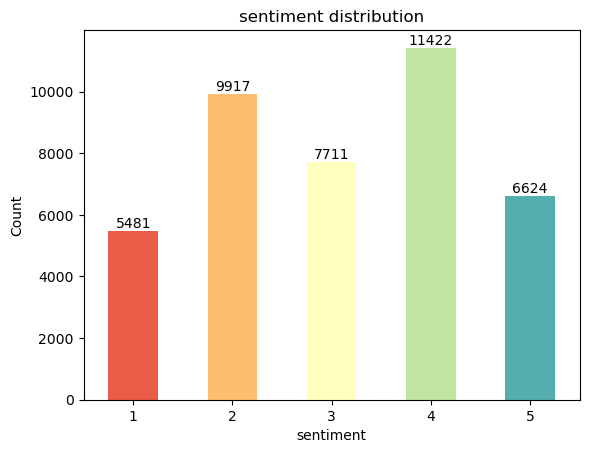

In [9]:
# Визуализация частоты оценок:
ax = train_df["sentiment"].value_counts().sort_index().plot.bar(
    color=PALETTE,
    title="sentiment distribution",
    rot=0,
)

for bars in ax.containers:
    ax.bar_label(bars)

ax.set_ylabel("Count");

### 2.3. TEXT

#### 2.3.1. Новые признаки

In [10]:
# Добавим новые признаки
def add_text_features(df: pd.DataFrame, column: str = "text") -> pd.DataFrame:
    """Returns new DataFrame with text features from column"""
    df["text_split"] = df[column].apply(lambda x: str(x).lower().strip().split())
    df["text_symbols_n"] = df[column].apply(lambda x: len(str(x)))
    df["text_list_len"] = df["text_split"].apply(lambda x: len(x))
    df["text_set_len"] = df["text_split"].apply(lambda x: len(set(x)))
    return df

In [11]:
train_df = add_text_features(train_df)
train_df

,text,sentiment,text_split,text_symbols_n,text_list_len,text_set_len
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3,"[@menyrbie, @phil_gahan, @chrisitv, https://t....",111,8,7
1,advice Talk to your neighbours family to excha...,4,"[advice, talk, to, your, neighbours, family, t...",237,38,33
2,Coronavirus Australia: Woolworths to give elde...,4,"[coronavirus, australia:, woolworths, to, give...",131,14,14
3,My food stock is not the only one which is emp...,4,"[my, food, stock, is, not, the, only, one, whi...",306,42,37
4,"Me, ready to go at supermarket during the #COV...",1,"[me,, ready, to, go, at, supermarket, during, ...",310,40,36
...,...,...,...,...,...,...
41150,Airline pilots offering to stock supermarket s...,3,"[airline, pilots, offering, to, stock, superma...",102,12,12
41151,Response to complaint not provided citing COVI...,1,"[response, to, complaint, not, provided, citin...",138,23,22
41152,You know itÂs getting tough when @KameronWild...,4,"[you, know, itâs, getting, tough, when, @kame...",136,18,18
41153,Is it wrong that the smell of hand sanitizer i...,3,"[is, it, wrong, that, the, smell, of, hand, sa...",111,18,16


In [12]:
# Cводные статистики по полученным признакам:
train_df.describe()

,sentiment,text_symbols_n,text_list_len,text_set_len
count,41155.000000,41155.000000,41155.000000,41155.000000
mean,3.092115,204.197692,30.500255,27.763091
std,1.298687,68.655884,11.591438,9.754834
min,1.000000,11.000000,1.000000,1.000000
25%,2.000000,151.000000,21.000000,20.000000
50%,3.000000,215.000000,32.000000,29.000000
75%,4.000000,259.000000,40.000000,36.000000
max,5.000000,355.000000,64.000000,51.000000


- в среднем длина текста составляет 204 символа (включая пробелы и другие спецсимволы)
- среднее количество слов равно 30.5
- среднее количество уникальных слов 27.8

#### 2.3.2. Посмотрим на новые признаки

Построим гистограмму для каждого нового признака

##### Длина текста

text_symbols_n
255    2297
280     461
279     417
278     375
281     324
       ... 
340       1
334       1
333       1
335       1
12        1
Name: count, Length: 329, dtype: int64

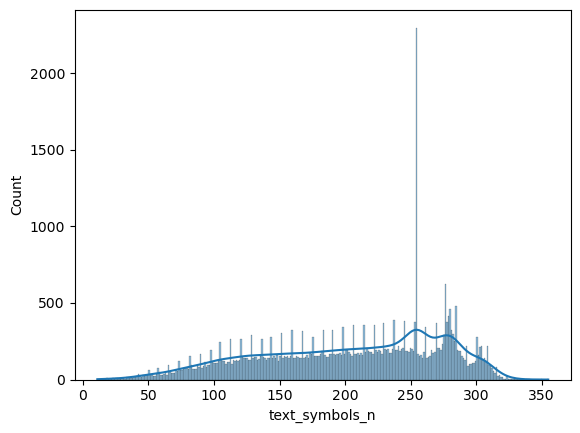

In [13]:
display(train_df["text_symbols_n"].value_counts())
sns.histplot(train_df["text_symbols_n"], bins=300, kde=True);

По длине текста (числу символов) все тексты <= 360 символов

Наблюдение: сильно выделяется длина 255 символов (при этом прослеживается равномерное распределение):

In [14]:
train_df[train_df["text_symbols_n"] == 255]["text"].values[:3]

array(['@10DowningStreet @grantshapps what is being done to ensure food and other essential products are being re-stocked at supermarkets and panic buying actively discouraged? It cannot be left to checkout staff to police the actions of the selfish and profiteer',
       '@TheJoshuaTurner @Loreign83 @peanut_astro @my_amigouk @afneil @BorisJohnson @patel4witham This is both disgusting and disgraceful charging over inflated prices for items for stopping the spread of COVID-19, the government really needs to do something abou',
       '@kroger Instead of paid sick leave, @kroger is providing 2 weeks paid leave ONLY to people who test positive for COVID-19 or are placed under mandatory quarantine\r\r\n\r\r\nThis is insufficient to protect staff and the public, especially with little testing av'],
      dtype=object)

Предположение: это ограничения по кол-ву символов в условной соцсети "DEFAULT_NETWORK" (на это намекают @ перед никнеймами и размер сообщения)

##### Число слов

text_list_len
40    1377
41    1349
37    1341
39    1331
38    1321
      ... 
1        2
61       1
60       1
64       1
62       1
Name: count, Length: 63, dtype: int64

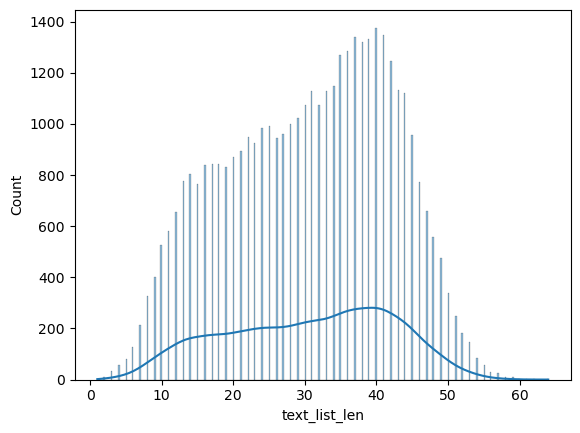

In [15]:
display(train_df["text_list_len"].value_counts())
sns.histplot(train_df["text_list_len"], bins=300, kde=True);

- сильных выбросов нет
- больше всего текстов по 40 слов

##### Число уникальных слов в отзыве

text_set_len
36    1773
35    1756
34    1635
33    1619
37    1598
Name: count, dtype: int64

text_set_len
1      2
51     4
2     12
50    16
49    25
Name: count, dtype: int64

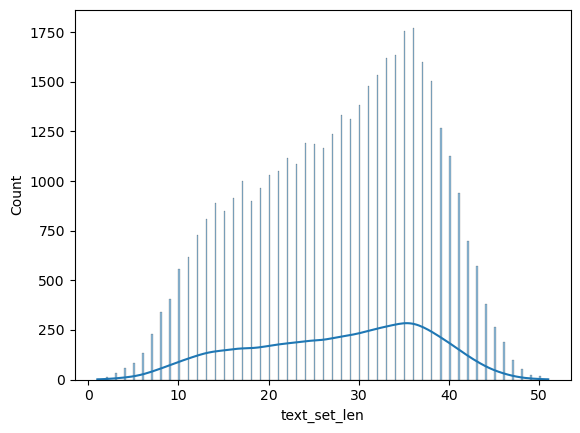

In [16]:
display(train_df["text_set_len"].value_counts().nlargest(5))
display(train_df["text_set_len"].value_counts().nsmallest(5))
sns.histplot(train_df["text_set_len"], bins=300, kde=True);

- сильных выбросов нет
- больше всего текстов по 36 уникальных слов

#### 2.3.3. Сводная таблица по новым признакам

In [17]:
# Создадим сводную таблицу со средними значениями новых признаков в зависимости от оценки:
pivot = pd.pivot_table(
    train_df,
    values=["text_symbols_n", "text_list_len", "text_set_len"],
    index="sentiment"
)
pivot = pivot.apply(lambda x: round(x, 2))
pivot

,text_list_len,text_set_len,text_symbols_n
sentiment,,,
1,34.46,31.03,221.48
2,30.65,27.94,203.33
3,23.14,21.48,168.14
4,30.92,28.16,207.06
5,34.85,31.43,228.24


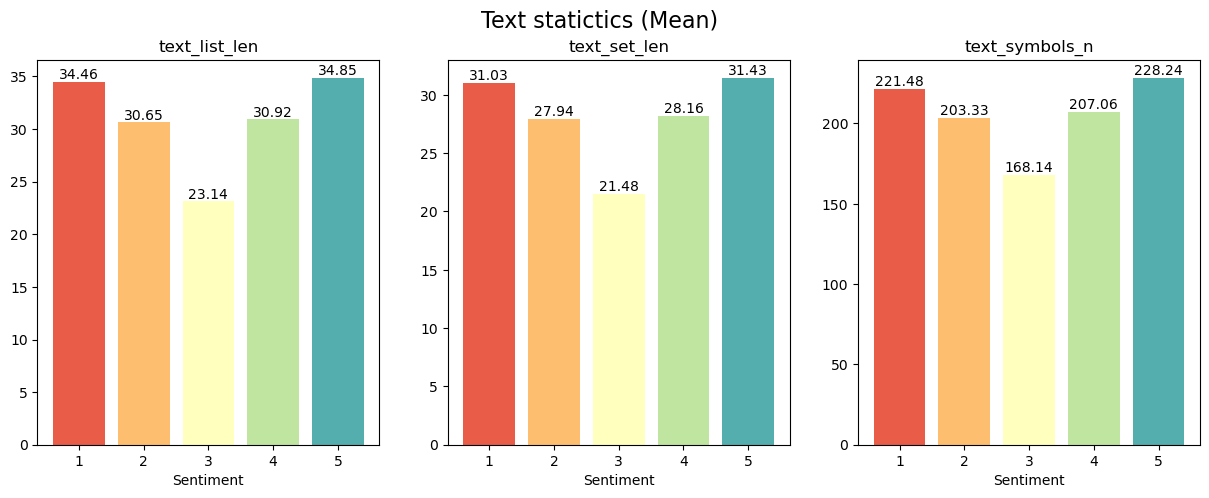

In [18]:
# Визуализируем данную таблицу:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Text statictics (Mean)", fontsize=16)

for index, column in enumerate(pivot.columns):
    ax = axs[index]
    ax.bar(
        x=pivot.index,
        height=pivot[column],
        color=PALETTE,
    )
    ax.set_title(column)
    ax.set_xlabel("Sentiment")

    for bars in ax.containers:
        ax.bar_label(bars)

Наблюдения:
* Нейтральные оценки в целом самые короткие
* Чем более экстремальная оценка => тем больше в среднем тексты по длине (как позитивные, так и негативные)
* Экстремальные оценки (1 и 5) и нормальные оценки (2 и 4) в среднем очень близки по длинам, но позитивных немного больше чем негативных 

Можно сделать вывод что чем более эмоциональный (негативный или позитивный) отзыв пишет человек, отзыв получиться более длинным. Оно и логично, т.к. у него будет больше мотивации

#### 2.3.4. Популярные слова

In [19]:
# Соберем все слова в один список и оценим как часто встречается каждое слово:
all_words_list = []
for text_list in train_df["text_split"]:
    all_words_list.extend(text_list)

all_words_series = pd.Series(all_words_list)
text_count_df = pd.DataFrame(all_words_series.value_counts())
text_count_df["word"] = text_count_df.index
text_count_df.index = range(text_count_df.shape[0])
text_count_df = text_count_df[text_count_df.columns.to_list()[::-1]]
text_count_df["len"] = text_count_df["word"].apply(lambda x: len(x))
text_count_df

,word,count,len
0,the,44544,3
1,to,38189,2
2,and,23850,3
3,of,21459,2
4,a,19205,1
...,...,...,...
120796,#inside,1,7
120797,https://t.co/4ayu5ulny9,1,23
120798,https://t.co/7vxyntxoyj,1,23
120799,https://t.co/6kzkuveeih,1,23


In [20]:
# Оставим слова с длиной больше 4 (если меньше, то будет слишком много различных служебных слов) и посмотрим, какие темы актуальны в данных отзывах больше всего:
text_count_df[text_count_df["len"] > 4].iloc[:30]

,word,count,len
6,#coronavirus,14935,12
15,prices,6654,6
21,grocery,5996,7
23,supermarket,5717,11
25,store,5533,5
26,covid-19,5518,8
28,people,5055,6
30,#covid19,4635,8
36,consumer,4115,8
43,&amp;,3581,5


Основные темы:
- ковид и все что связано с пандемией коронавируса
- онлайн
- туал. бумага


### 2.4. Выводы

* Мы работаем с текстами, которые написаны во время эпиденмии коронавируса
* Чем более эмоциональный отзыв хочет написать юзер => тем длинее будет отзыв, что ожидаемо

## 3. Чистим данные

In [21]:
# Создадим копию предочищенного блокнота:
train_clean_df = train_df[["text", "sentiment"]].copy()
train_clean_df

,text,sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3
1,advice Talk to your neighbours family to excha...,4
2,Coronavirus Australia: Woolworths to give elde...,4
3,My food stock is not the only one which is emp...,4
4,"Me, ready to go at supermarket during the #COV...",1
...,...,...
41150,Airline pilots offering to stock supermarket s...,3
41151,Response to complaint not provided citing COVI...,1
41152,You know itÂs getting tough when @KameronWild...,4
41153,Is it wrong that the smell of hand sanitizer i...,3


In [22]:
# Функции для очистки текстов:

# перевести в нижний регистр + обрезать пробельные символы слева и справа
def prepare_text(text: str) -> str:
    "Returns stripped text in low case"
    return text.lower().strip()


# удалить ссылки
def remove_links(text: str) -> str:
    """Removes links and non-ASCII characters"""
    text = "".join([x for x in text if x in string.printable])
    # Removing URLs
    text = re.sub(r"http\S+", "", text)
    return text


# удалить remove_emoji
def remove_emoji(text: str) -> str:
    """Removes emojis"""
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE
    )
    return emoji_pattern.sub(r"", text)


# удалить знаки пунктуации
def remove_punctuations(text: str):
    """Removes punctuations"""
    table = str.maketrans("","",string.punctuation)
    result = text.translate(table)
    return result


# удалить спец символы
def remove_special_characters(text: str) -> str:
    """Removes special characters and digits"""
    pattern = r"[^a-zA-z0-9\s]"
    text = re.sub(pattern,"",text)
    text = re.sub(r"[0-9]+", "", text)
    return text


# удалить стоп-слова
def remove_stopwords(text: str) -> str:
    """Removes stopwords from text"""
    tokenizer = NLTKWordTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in STOPWORDS]
    filtered_text = " ".join(filtered_tokens)    
    return filtered_text


# Аббревиатуры
def _convert_abbrev(word: str) -> str:
    """takes one word and replaces it by abbreviation if word in abbreviations dict"""
    return ABBREVIATIONS[word.lower()] if word.lower() in ABBREVIATIONS.keys() else word


# расшифровать аббревиатуры
def convert_abbrev_in_text(text: str) -> str:
    """Replaces all abbreviations in text"""
    tokenizer = NLTKWordTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [_convert_abbrev(word) for word in tokens]
    text = " ".join(tokens)
    return text


# Denoise text
def _strip_html(text: str) -> str:
    """strips text as html"""
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()


def _remove_between_square_brackets(text: str) -> str:
    """removes symbols between square brakets"""
    return re.sub("\[[^]]*\]", "", text)


# Шумопонижение
def denoise_text(text: str) -> str:
    """Strips text as html and removes symbols between square brakets"""
    text = _strip_html(text)
    text = _remove_between_square_brackets(text) 
    return text


# Clean text pipeline
def clean_text_pipeline(text: str) -> str:
    """Cleans input text and returns cleaned one"""
    text = prepare_text(text)
    text = remove_links(text)
    text = remove_emoji(text)
    text = remove_stopwords(text)
    text = remove_punctuations(text)
    text = convert_abbrev_in_text(text)
    text = denoise_text(text)
    text = remove_special_characters(text)
    return text


# Stem and lemmatize
def stem_text(text):
    """Gets input text and returns stemmed one"""
    stemmer = SnowballStemmer(language="english")
    return " ".join([stemmer.stem(word) for word in text.split()])


# Лемматизация
def lemmatize_text(text):
    """Gets input text and returns lemmatized one"""
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [23]:
# Применим данную функцию и добавим числовые фичи для очищенного текста:

TEXT_CLEAN_COLUMN = "text_clean"
train_clean_df[TEXT_CLEAN_COLUMN] = train_clean_df["text"].apply(clean_text_pipeline)
train_clean_df['text_stemmer'] = train_clean_df[TEXT_CLEAN_COLUMN].apply(stem_text)
train_clean_df['text_lemma'] = train_clean_df[TEXT_CLEAN_COLUMN].apply(lemmatize_text)
train_clean_df = add_text_features(train_clean_df, TEXT_CLEAN_COLUMN)
train_clean_df

,text,sentiment,text_clean,text_stemmer,text_lemma,text_split,text_symbols_n,text_list_len,text_set_len
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3,menyrbie philgahan chrisitv,menyrbi philgahan chrisitv,menyrbie philgahan chrisitv,"[menyrbie, philgahan, chrisitv]",27,3,3
1,advice Talk to your neighbours family to excha...,4,advice talk neighbours family exchange phone n...,advic talk neighbour famili exchang phone numb...,advice talk neighbour family exchange phone nu...,"[advice, talk, neighbours, family, exchange, p...",196,27,24
2,Coronavirus Australia: Woolworths to give elde...,4,coronavirus australia woolworths give elderly ...,coronavirus australia woolworth give elder dis...,coronavirus australia woolworth give elderly d...,"[coronavirus, australia, woolworths, give, eld...",99,12,12
3,My food stock is not the only one which is emp...,4,food stock one empty please nt panic enough fo...,food stock one empti pleas nt panic enough foo...,food stock one empty please nt panic enough fo...,"[food, stock, one, empty, please, nt, panic, e...",170,23,20
4,"Me, ready to go at supermarket during the #COV...",1,ready go supermarket covid outbreak m paranoid...,readi go supermarket covid outbreak m paranoid...,ready go supermarket covid outbreak m paranoid...,"[ready, go, supermarket, covid, outbreak, m, p...",187,23,23
...,...,...,...,...,...,...,...,...,...
41150,Airline pilots offering to stock supermarket s...,3,airline pilots offering stock supermarket shel...,airlin pilot offer stock supermarket shelv nz ...,airline pilot offering stock supermarket shelf...,"[airline, pilots, offering, stock, supermarket...",67,9,9
41151,Response to complaint not provided citing COVI...,1,response complaint provided citing covid relat...,respons complaint provid cite covid relat dela...,response complaint provided citing covid relat...,"[response, complaint, provided, citing, covid,...",108,16,16
41152,You know itÂs getting tough when @KameronWild...,4,know getting tough kameronwilds rationing toil...,know get tough kameronwild ration toilet paper...,know getting tough kameronwilds rationing toil...,"[know, getting, tough, kameronwilds, rationing...",106,13,13
41153,Is it wrong that the smell of hand sanitizer i...,3,wrong smell hand sanitizer starting turn coron...,wrong smell hand sanit start turn coronavirus ...,wrong smell hand sanitizer starting turn coron...,"[wrong, smell, hand, sanitizer, starting, turn...",70,9,8


Стемминг + лемматизацию оставляем, чтобы потенционально юзать их в следующем домашнем задании

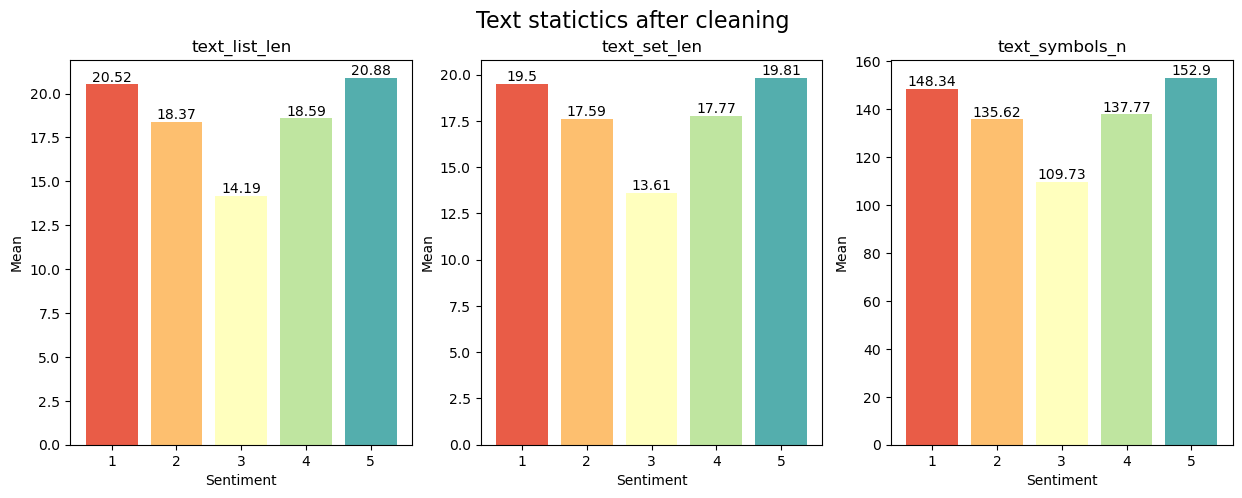

In [24]:

# Посмотрим на статистики по числовым фичам в зависимости от оценки после очистки:

TEXT_NUM_COLUMNS = ["text_symbols_n", "text_list_len", "text_set_len"]

pivot_clean = pd.pivot_table(
    train_clean_df,
    values=TEXT_NUM_COLUMNS,
    index="sentiment"
)
pivot_clean = pivot_clean.apply(lambda x: round(x, 2))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Text statictics after cleaning", fontsize=16)

for index, column in enumerate(pivot_clean.columns):
    ax: plt.Axes = axs[index]
    ax.bar(
        x=pivot_clean.index,
        height=pivot_clean[column],
        color=PALETTE,
    )
    ax.set_title(column)
    ax.set_xlabel("Sentiment")
    ax.set_ylabel("Mean")

    for bars in ax.containers:
        ax.bar_label(bars)

После очистки средние явно уменьшились, но достаточно пропорционально.
При этом соотношения между разными оценками почти не изменились.

,text_symbols_n,text_list_len,text_set_len
mean,135.840238,18.340323,17.507423
std,49.509604,6.788707,6.297817
min,0.000000,0.000000,0.000000
25%,97.000000,13.000000,13.000000
50%,142.000000,19.000000,18.000000
75%,175.000000,24.000000,22.000000
max,284.000000,42.000000,38.000000


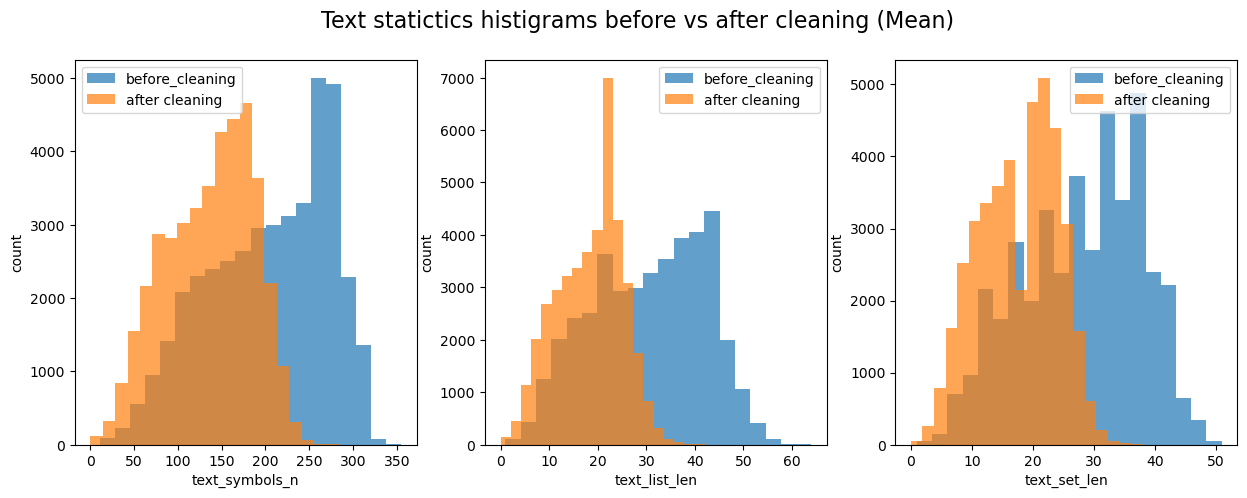

In [25]:
# Гистограммы по числовым признакам после очистки:

display(train_clean_df.describe().iloc[1:,1:])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Text statictics histigrams before vs after cleaning (Mean)", fontsize=16)
for index, column in enumerate(TEXT_NUM_COLUMNS):
    ax: plt.Axes = axs[index]
    for df, status in zip(
        [
            train_df,
            train_clean_df,
        ],
        [
            "before_cleaning",
            "after cleaning",
        ],
    ):
        ax.hist(
            x=df[column],
            label=status,
            bins=20,
            alpha=0.7,
        )
    ax.set_xlabel(column)
    ax.set_ylabel("count")
    ax.legend()

Тексты сильно потеряли в кол-ве символов и слов.

# Моделирование

## 0. Разделение на тестовую и тренировочную выборку

In [26]:
# Разделение на тестовую и тренировочную выборку
X = train_clean_df
y = train_clean_df["sentiment"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)
X_train_with_y: pd.DataFrame = X_train
X_test_with_y: pd.DataFrame = X_test
X_train: pd.DataFrame = X_train.drop(columns=["sentiment"]) 
X_test: pd.DataFrame = X_test.drop(columns=["sentiment"]) 
y_train = y_train
y_test = y_test

## 1. Baseline
Нужна эвристика для предсказания целевого класса. 
Вначале пока не юзаем машинное обучение, а только наивные методы ML.

В качестве метрики выберем accuracy = % правильно указанных классов.

In [27]:
# Результат сохрнаим во вспомогательный датафрейм с оценками:
evaluate_df = pd.DataFrame(columns=["method", "accuracy"], index=range(1))
evaluate_df

,method,accuracy
0,NaN,NaN


### 1.1. Random

In [28]:
# Пока простейший  Random Choise:

baseline_df = X_test_with_y.copy()

METHOD = "random"
INDEX = 0
baseline_df[METHOD] = np.random.choice(range(1, 6), size=baseline_df.shape[0])
accuracy = accuracy_score(baseline_df["sentiment"].values, baseline_df[METHOD].values)

evaluate_df.loc[INDEX, "method"] = METHOD
evaluate_df.loc[INDEX, "accuracy"] = accuracy
evaluate_df

,method,accuracy
0,random,0.200219


Для классификации с 5-ю классами такой подход дает ~20% точности.

### 1.2. Самый популярный класс

Если всем текстам передать оценку самого распространенного класса (4, хорошо), то получится 28% точности (в соответствии с долей данного класса в общей выборке):

In [29]:
METHOD = "most_popular"
INDEX = 1
baseline_df[METHOD] = 4
accuracy = accuracy_score(baseline_df["sentiment"].values, baseline_df[METHOD].values)

evaluate_df.loc[INDEX, "method"] = METHOD
evaluate_df.loc[INDEX, "accuracy"] = accuracy
evaluate_df

,method,accuracy
0,random,0.200219
1,most_popular,0.279917


### 1.3. Эвристика по распространенности конкретных слов

Пробуем такой алгоритм: а) train для каждой оценки создадим набор уникальных слов -> б) из каждого такого набора уберем слова, которые имеются во всех 5 наборах -> в) пробежимся по каждому тексту из test и посчитаем, сколько слов из данного текста встречаются в наборе уникальных слов для каждой оценки -> г) если есть 1 максимум по числу слов для данной оценки, то выставляем соответствующую оценку. Если же такой максимум не единственный, то выставляем самую популярную оценку 4.

In [44]:
# создаем наборы уникальных слов
stats_dfs_list = []
for sentiment in range(1, 6):
    all_words_list = []
    for text_list in X_train_with_y[X_train_with_y["sentiment"] == sentiment]["text_split"]:
        all_words_list.extend(text_list)
    all_words_series = pd.Series(all_words_list)
    clean_text_count_df = pd.DataFrame(all_words_series.value_counts())
    clean_text_count_df["word"] = clean_text_count_df.index
    clean_text_count_df.index = range(clean_text_count_df.shape[0])
    clean_text_count_df = clean_text_count_df[clean_text_count_df.columns.to_list()[::-1]]
    clean_text_count_df["len"] = clean_text_count_df["word"].apply(lambda x: len(x))
    stats_dfs_list.append(clean_text_count_df)
sets_list = []
for index in range(5):
    sets_list.append(set(stats_dfs_list[index]["word"].values))
union = set.intersection(*sets_list)
unique_words_lists = [sorted(words - union) for words in sets_list]

# проверяем тексты в тестовой выборке
df_slice = X_test_with_y[["text_split", "sentiment"]].values
logger.info(f"df rows number: {df_slice.shape[0]}")
clf_dict = {}
initial_sentiment_list = [0 for _ in range(5)]
sentiments_list = sorted(X_test_with_y["sentiment"].unique())
logger.debug("Main loop start")
for index, (text, sentiment) in enumerate(df_slice):
    clf_dict.update(
        {
            index: {
                "sentiment": sentiment,
                "evaluation": initial_sentiment_list.copy(),
                "sentiment_pred": 4,
            }
        }
    )
    for word in text:
        for i, unique_words in enumerate(unique_words_lists):
            if word in unique_words:
                clf_dict[index]["evaluation"][i] += 1

    evaluation: list = clf_dict[index]["evaluation"]
    max_words: int = max(evaluation)
    max_words_count = evaluation.count(max_words)
    if max_words_count == 1:
        clf_dict[index]["sentiment_pred"] = evaluation.index(max_words) + 1
    if ((index != 0) and ((index) % 2000 == 0)) or (index == df_slice.shape[0] - 1):
        counter = 0
        for dct in clf_dict.values():
            if dct["sentiment"] == dct["sentiment_pred"]:
                counter += 1
        logger.info(f"Text index = {index}, accuracy = {round(counter / len(clf_dict), 3)}")
logger.debug("Main loop end")

accuracy = counter / len(clf_dict)

2023-12-19 20:12:15.355 | INFO     | __main__:<module>:22 - df rows number: 8231
2023-12-19 20:12:15.356 | DEBUG    | __main__:<module>:26 - Main loop start
2023-12-19 20:13:02.453 | INFO     | __main__:<module>:52 - Text index = 2000, accuracy = 0.316
2023-12-19 20:13:43.964 | INFO     | __main__:<module>:52 - Text index = 4000, accuracy = 0.309
2023-12-19 20:14:24.698 | INFO     | __main__:<module>:52 - Text index = 6000, accuracy = 0.304
2023-12-19 20:15:04.408 | INFO     | __main__:<module>:52 - Text index = 8000, accuracy = 0.302
2023-12-19 20:15:09.000 | INFO     | __main__:<module>:52 - Text index = 8230, accuracy = 0.302
2023-12-19 20:15:09.001 | DEBUG    | __main__:<module>:53 - Main loop end


In [31]:
# Результаты (без запуска вычислений на прошлом этапе)
counter = 2483
len_clf_dict = 8231
accuracy = counter / len_clf_dict

In [32]:
METHOD = "unique_words"
INDEX = 2

evaluate_df.loc[INDEX, "method"] = METHOD
evaluate_df.loc[INDEX, "accuracy"] = accuracy
evaluate_df

,method,accuracy
0,random,0.200219
1,most_popular,0.279917
2,unique_words,0.301664


Точность 30%.
Недостаток:
- минимальное улучшение по сравнению с самым популярным классом
- по времени данный алгоритм ну очень тяжеловесный (8к результатов почти за 3 минуты)

Данный алгоритм работает значительно лучше, если "скормить" ему целевую переменную:
- вытащить уникальные слова из всего набора текстов
- попробовать предсказать настроение для всех же текстов

=> в таком случае точность вырастает до ~63%.
Для того чтобы не увличивать и без того большой ноутбук, приведет вывод без кода.

```log
2023-12-11 11:55:26.414 | INFO     | __main__:<module>:2 - df rows number: 41155
2023-12-11 11:55:26.416 | DEBUG    | __main__:<module>:7 - Main loop start
2023-12-11 11:56:09.577 | INFO     | __main__:<module>:33 - Text index = 2000, accuracy = 0.617
2023-12-11 11:56:47.884 | INFO     | __main__:<module>:33 - Text index = 4000, accuracy = 0.617
2023-12-11 11:57:28.774 | INFO     | __main__:<module>:33 - Text index = 6000, accuracy = 0.616
2023-12-11 11:58:06.607 | INFO     | __main__:<module>:33 - Text index = 8000, accuracy = 0.621
2023-12-11 11:58:42.085 | INFO     | __main__:<module>:33 - Text index = 10000, accuracy = 0.62
2023-12-11 11:59:19.709 | INFO     | __main__:<module>:33 - Text index = 12000, accuracy = 0.623
2023-12-11 11:59:56.141 | INFO     | __main__:<module>:33 - Text index = 14000, accuracy = 0.622
2023-12-11 12:00:33.923 | INFO     | __main__:<module>:33 - Text index = 16000, accuracy = 0.626
2023-12-11 12:01:09.220 | INFO     | __main__:<module>:33 - Text index = 18000, accuracy = 0.628
2023-12-11 12:01:45.349 | INFO     | __main__:<module>:33 - Text index = 20000, accuracy = 0.63
```

**Вывод**:
алгортим на основе уникальных слов для конкретных классов работает ЛИШЬ НЕМНОГОИМ лучше оценки самым популярным классом, но при этом имеет недостатки:
- хорошей предсказательной сопособностью не обладает
- по времени тоже очень прожорлив

Поэтому возьмем его в качестве бейзлайна. 

## 2. Векторизация и классические ML-алгоритмы

### 2.0. Векторизуем и подготовим данные

In [33]:
vectorizer = CountVectorizer()

vec_train = vectorizer.fit_transform(X_train["text_clean"]).toarray()
vec_test = vectorizer.transform(X_test["text_clean"]).toarray()

Добавим столбцы с числовыми данными по статистикам очищенного текста:

In [34]:
vec_train = np.hstack([vec_train, X_train[X_train.columns[-3:]].values])
vec_test = np.hstack([vec_test, X_test[X_test.columns[-3:]].values])

Сохраним веса:

In [35]:
y_classes = X_train_with_y["sentiment"].unique()
weights = compute_class_weight(
    class_weight='balanced',
    classes=y_classes,
    y=y_train
)
class_weights = {_class: weight for _class, weight in zip(y_classes, weights)}
class_weights

{3: 1.0653292347516583,
 2: 0.8291110551498363,
 4: 0.7221759157710024,
 5: 1.247121212121212,
 1: 1.495525777878719}

### 2.1. MultinomialNB

Наивный Байесовский классификатор:

In [36]:
# константы
METHOD = "multinomial_naive_bayes"
INDEX = 3
MODEL_PATH = f"./models/{METHOD}.pcl"

In [ ]:
# модели еще нет => обучаем
model = MultinomialNB()
model.fit(vec_train, y_train)
y_pred = model.predict(vec_test)
accuracy = accuracy_score(y_pred, y_test)
with open(MODEL_PATH, "wb") as file:
    pickle.dump(model, file)

In [38]:
# модель уже есть => для экономии времени подгружаем ее
with open(MODEL_PATH, "rb") as file:
    model: MultinomialNB() = pickle.load(file)
    y_pred = model.predict(vec_test)
    accuracy = accuracy_score(y_pred, y_test)

In [39]:
# результат -> в талблицу
evaluate_df.loc[INDEX, "method"] = METHOD
evaluate_df.loc[INDEX, "accuracy"] = accuracy
evaluate_df

,method,accuracy
0,random,0.200219
1,most_popular,0.279917
2,unique_words,0.301664
3,multinomial_naive_bayes,0.443203


Результат с помощью наивного Байесовского классификатора = ~44%, а это значительный прогресс по сравнению с другими методами.

### 2.2. RandomForestClassifier

In [40]:
# константы
METHOD = "random_forest_classifier"
INDEX = 4
MODEL_PATH = f"./models/{METHOD}.pcl"

In [ ]:
# если модели еще нет =>
model = RandomForestClassifier(
    n_estimators=100,
    class_weight=class_weights,
    warm_start=True,
    n_jobs=-1,
)
model.fit(vec_train, y_train)
y_pred = model.predict(vec_test)
accuracy = accuracy_score(y_pred, y_test)
with open(MODEL_PATH, "wb") as file:
    pickle.dump(model, file)

In [41]:
# если модель есть (чтобы не оубчать все заново = экономия времени)
with open(MODEL_PATH, "rb") as file:
    model: RandomForestClassifier() = pickle.load(file)
    y_pred = model.predict(vec_test)
    accuracy = accuracy_score(y_pred, y_test)

In [42]:
# записываем результат в табличку
evaluate_df.loc[INDEX, "method"] = METHOD
evaluate_df.loc[INDEX, "accuracy"] = accuracy
evaluate_df

,method,accuracy
0,random,0.200219
1,most_popular,0.279917
2,unique_words,0.301664
3,multinomial_naive_bayes,0.443203
4,random_forest_classifier,0.526303


Случайный лес улучшил результаты на <10% в сравнении с наивным Байесом, а считается в десятки раз дольше. Являются ли такие жертвы оправданными вопрос открытый

# Вывод

Проанализировали 41к текстов на предмет оценки их настроения (от 1 до 5, где 1-негативный, а 5-превосходный) и сделали следующие выводы:
* мы имеем дело с текстами, которые написаны по времена пандемии коронавируса
* чем более эмоциональный текст (т.е. чем более негативный и наоброт - более позитивный) => тем длиннее текст
=> нейтральные тексты самые короткие

Рассмотрели 5 моделей для предсказания настроения текстов:
* Три модели, без использования машинного обучения:
    * фулл-рандом (точность = 20%)
    * самый распространенный класс (точность = 28%)
    * эвристика (частота вхождения уникальных для данного класса слов собственного производства) (точность=30%, скорость 8к текстов за 3 мин)
* 2 классических ML-модели
    * MultinomialNB (точность = 44% точности, скорость = 8к текстов за 2 минуты)
    * RandomForestClassifier (точность = 53%, скорость = 8к текстов за 60 минут)

In [48]:
evaluate_df.to_csv("./data/evaluate.csv", index=False)
X_train_with_y.to_csv("./data/X_train_with_y.csv", index=False)
X_test_with_y.to_csv("./data/X_test_with_y.csv", index=False)